# Project Title - Video Game Sales

In this project, I am going to utilize Video Game Sales dataset to analyze and visualize the data. The dataset was being download from Kaggle. I am going to use Pandas, Numpy, Matplotlib, and Seaborn to analyze and visalize the data.

## Downloading the Dataset

Game sales dataset are being download from kaggle

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/gregorut/videogamesales' 

In [3]:
import opendatasets as od
od.download('https://www.kaggle.com/gregorut/videogamesales')

Skipping, found downloaded files in ".\videogamesales" (use force=True to force download)


The dataset has been downloaded and extracted.

In [4]:
data_dir = './videogamesales'

In [5]:
import os
os.listdir(data_dir)

['vgsales.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = 'gamesales' 

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "carllam23/gamesales" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/carllam23/gamesales


'https://jovian.ai/carllam23/gamesales'

# Data Preparation and Cleaning

Import pandas library

In [10]:
import pandas as pd
import numpy as np
from numpy import nan

Load the csv file

In [11]:
df_raw_sales = pd.read_csv('./videogamesales/vgsales.csv')

The dataset has 16598 rows and 11 columns

In [12]:
df_raw_sales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [13]:
df_raw_sales['Year'].dtype

dtype('float64')

In [14]:
df_raw_sales.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [15]:
selected_columns = ['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

In [16]:
df_sales = df_raw_sales[selected_columns].copy()

Change the format of Year

In [17]:
df_sales['Year'] = pd.to_datetime(df_raw_sales['Year'], format='%Y')

Basic information of the dataset, the total number of rows are 16598, it implies that Year and Publisher column has missing value.

In [18]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Rank          16598 non-null  int64         
 1   Name          16598 non-null  object        
 2   Platform      16598 non-null  object        
 3   Year          16327 non-null  datetime64[ns]
 4   Genre         16598 non-null  object        
 5   Publisher     16540 non-null  object        
 6   NA_Sales      16598 non-null  float64       
 7   EU_Sales      16598 non-null  float64       
 8   JP_Sales      16598 non-null  float64       
 9   Other_Sales   16598 non-null  float64       
 10  Global_Sales  16598 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 1.4+ MB


Check if there is any missing values

In [19]:
df_sales.isnull().values.any()

True

Year has 271 missing value and Publisher has 58 missing value

In [20]:
df_sales.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Delete the rows with missing values

In [21]:
df_sales = df_raw_sales.dropna(axis=0)

305 rows have been deleted, new dataframe has 16291 rows

In [22]:
df_sales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [23]:
df_sales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [24]:
df_sales.sample(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6690,6692,Gex 64: Enter the Gecko,N64,1998.0,Action,GT Interactive,0.20,0.05,0.00,0.00,0.25
1973,1975,Tag Team Match M.U.S.C.L.E.,NES,1985.0,Fighting,Namco Bandai Games,0.00,0.00,1.05,0.00,1.05
15543,15546,Poyo Poyo Kansatsu Nikki,3DS,2012.0,Action,IE Institute,0.00,0.00,0.02,0.00,0.02
8414,8416,Toukiden Kiwami,PS4,2015.0,Action,Tecmo Koei,0.05,0.07,0.02,0.02,0.17
10324,10326,Attack of the Movies 3D,Wii,2010.0,Shooter,Majesco Entertainment,0.10,0.00,0.00,0.01,0.11
12693,12695,Ride to Hell,X360,2013.0,Racing,Deep Silver,0.04,0.01,0.00,0.00,0.06
5163,5165,Dreamworks Madagascar Kartz,DS,2009.0,Racing,Activision,0.25,0.08,0.00,0.03,0.36
9818,9820,Rocket: Robot on Wheels,N64,1999.0,Platform,Ubisoft,0.10,0.02,0.00,0.00,0.12
1808,1810,WWE 2K15,PS4,2014.0,Sports,Take-Two Interactive,0.38,0.56,0.00,0.19,1.13
10048,10050,NFL Head Coach 09,X360,2008.0,Sports,Electronic Arts,0.11,0.00,0.00,0.01,0.11


Set Rank to be the index

In [25]:
df_sales.set_index('Rank')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [26]:
import jovian

In [27]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "carllam23/gamesales" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/carllam23/gamesales


'https://jovian.ai/carllam23/gamesales'

## Exploratory Analysis and Visualization

Analyze data and visualize data



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [28]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Top Gaming Platform

There are 31 unique gaming platform

In [29]:
df_sales.Platform.nunique()

31

Get the top 10 platform by using head()

In [30]:
top_platform = df_sales.Platform.value_counts().head(10)
top_platform

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
Name: Platform, dtype: int64

x-axis is the platform and y-axis is the value count of the platform appear in the dataset.
DS, PS2, and PS3 are the top 3 gaming platform

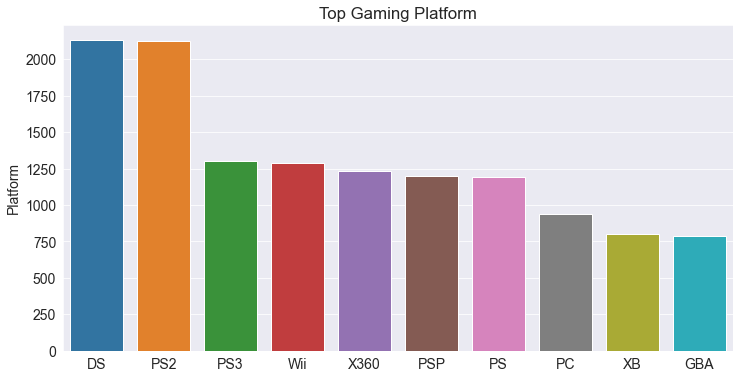

In [31]:
plt.figure(figsize=(12,6))
plt.title('Top Gaming Platform')
sns.barplot(x=top_platform.index, y=top_platform);

# Top Gaming Publisher

There are 578 unique gaming publisher

In [32]:
df_sales.Publisher.nunique()

576

Get the top gaming publisher by using head()

In [33]:
top_Publisher = df_sales.Publisher.value_counts().head(10)
top_Publisher

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
THQ                              712
Nintendo                         696
Sony Computer Entertainment      682
Sega                             632
Take-Two Interactive             412
Name: Publisher, dtype: int64

x-axis is the publisher and y-axis is the value count of the publisher appear in the dataset. EA is the top gaming publisher

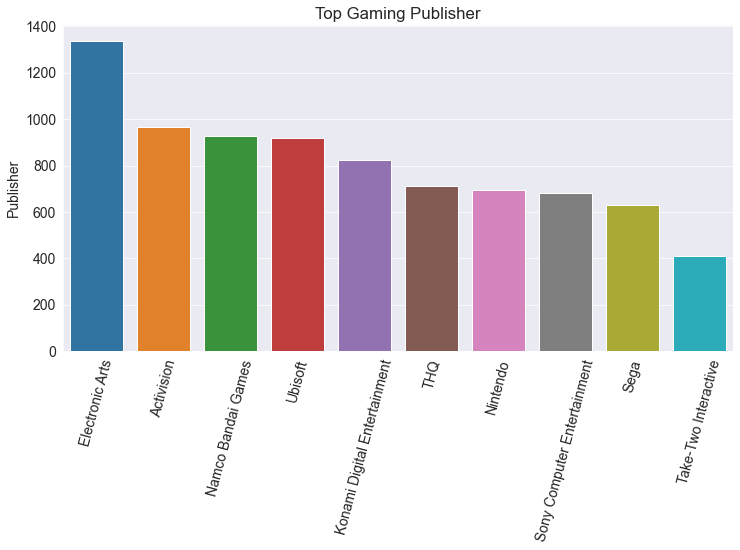

In [34]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Top Gaming Publisher')
sns.barplot(x=top_Publisher.index, y=top_Publisher);

# Top Gaming Genre

There are 12 different gaming genre

In [35]:
df_sales.Genre.nunique()

12

In [36]:
top_Genre = df_sales.Genre.value_counts().head(12)
top_Genre

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

x-axis is the gaming genre and y-axis is the value count of the genre appear in the dataset. Action is the top gaming genre

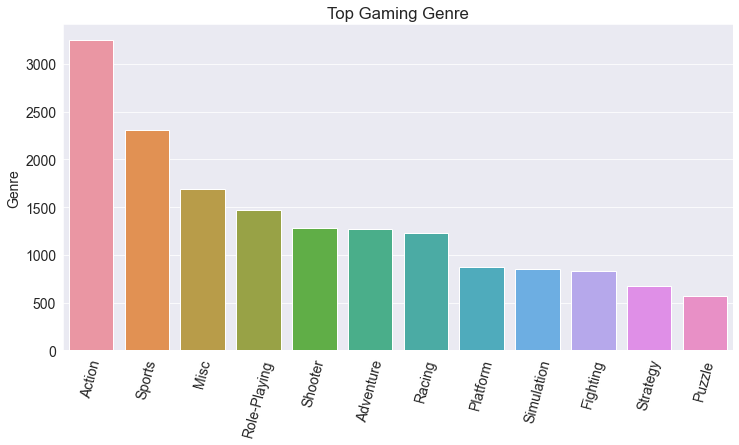

In [37]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Top Gaming Genre')
sns.barplot(x=top_Genre.index, y=top_Genre);

# Global Sales per Year

In [38]:
df_sales1 = df_sales.groupby("Year")[['Global_Sales']].sum()

In [39]:
df_sales1

,Global_Sales
Year,
1980.0,11.38
1981.0,35.77
1982.0,28.86
1983.0,16.79
1984.0,50.36
1985.0,53.94
1986.0,37.07
1987.0,21.74
1988.0,47.22


Global sales of each year

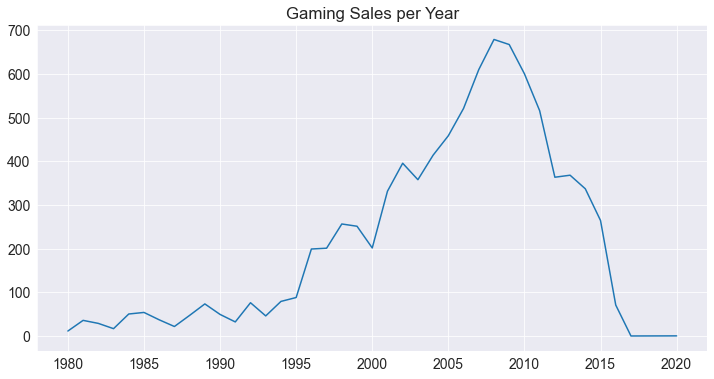

In [40]:
plt.figure(figsize=(12,6))
plt.title('Gaming Sales per Year')
plt.plot(df_sales1.index,df_sales1.Global_Sales);

The year of 2008 has the most global gaming sales 

In [41]:
import jovian

In [42]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "carllam23/gamesales" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/carllam23/gamesales


'https://jovian.ai/carllam23/gamesales'

## Asking and Answering Questions




# Q1: Which year has the most global sales?

Group global sales by year

In [43]:
data_year = df_sales.groupby(by=['Year'])['Global_Sales'].sum()
data_year = data_year.reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '1980.0'),
  Text(1, 0, '1981.0'),
  Text(2, 0, '1982.0'),
  Text(3, 0, '1983.0'),
  Text(4, 0, '1984.0'),
  Text(5, 0, '1985.0'),
  Text(6, 0, '1986.0'),
  Text(7, 0, '1987.0'),
  Text(8, 0, '1988.0'),
  Text(9, 0, '1989.0'),
  Text(10, 0, '1990.0'),
  Text(11, 0, '1991.0'),
  Text(12, 0, '1992.0'),
  Text(13, 0, '1993.0'),
  Text(14, 0, '1994.0'),
  Text(15, 0, '1995.0'),
  Text(16, 0, '1996.0'),
  Text(17, 0, '1997.0'),
  Text(18, 0, '1998.0'),
  Text(19, 0, '1999.0'),
  Text(20, 0, '2000.0'),
  Text(21, 0, '2001.0'),
  Text(22, 0, '2002.0'),
  Text(23, 0, '2003.0'),
  Text(24, 0, '2004.0'),
  Text(25, 0, '2005.0'),
  Text(26, 0, '2006.0'),
  Text(27, 0, '2007.0'),
  Text(28, 0, '2008.0'),
  Text(29, 0, '2009.0'),
  Text(30, 0, '2010.0'),
  Text(31, 0, '2011.0'),
  Text(32, 0, '2012.0'),
  T

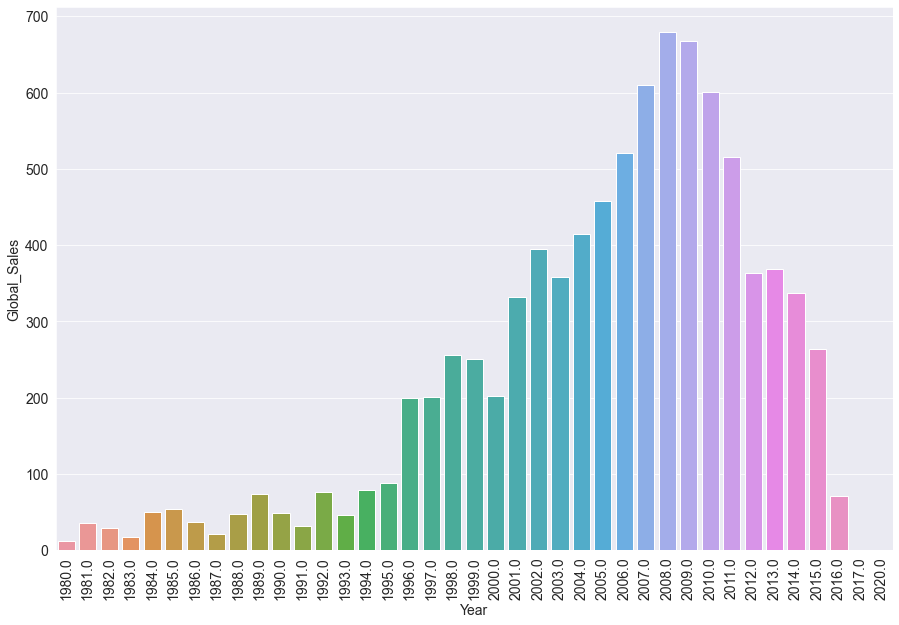

In [44]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Year", y="Global_Sales", data=data_year)
plt.xticks(rotation=90)

X-axis is the year and Y-axis is the global sales.The year of 2008 has the most global sales

# Q2 Which genre has the highest global sales?

group global sales by gaming genre

In [45]:
data_genre = df_sales.groupby(by=['Genre'])['Global_Sales'].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by=['Global_Sales'], ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Shooter'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Platform'),
  Text(5, 0, 'Misc'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Fighting'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Puzzle'),
  Text(10, 0, 'Adventure'),
  Text(11, 0, 'Strategy')])

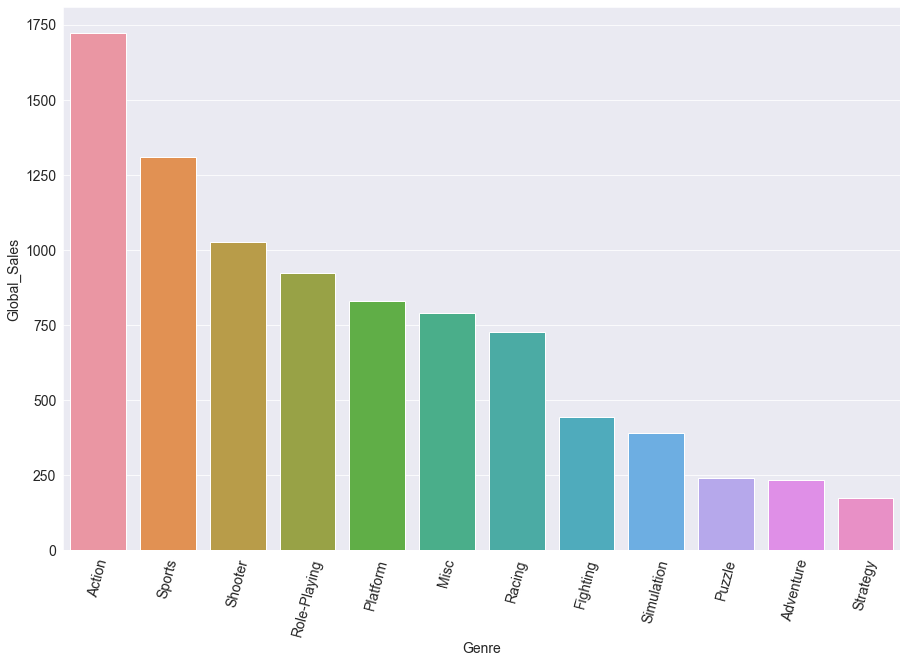

In [46]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="Global_Sales", data=data_genre)
plt.xticks(rotation=75)

X-axis is the genre and Y-axis is the global sales. Action has the most global sales among all genre

# Q3: Which region has the top sales?

In [47]:
top_sales_region = df_sales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

dataframe of each region per sales

In [48]:
top_sales_region = top_sales_region.sum().reset_index()
top_sales_region = top_sales_region.rename(columns={"index": "region", 0: "sales"})
top_sales_region

,region,sales
0,NA_Sales,4327.65
1,EU_Sales,2406.69
2,JP_Sales,1284.27
3,Other_Sales,788.91


In [49]:
labels = top_sales_region['region']
sizes = top_sales_region['sales']

Conduct a pie chart of distribution of global sales

([<matplotlib.patches.Wedge at 0x26f238af9a0>,
 [Text(-1.0995946696115964, 0.029859044890360037, 'NA_Sales'),
  Text(0.7922706574673692, -0.7630905616741847, 'EU_Sales'),
  Text(0.9378314250625531, 0.5748671308790761, 'JP_Sales'),
  Text(0.30547029027007794, 1.056734546497991, 'Other_Sales')],
 [Text(-0.5997789106972343, 0.0162867517583782, '49.1%'),
  Text(0.4321476313458377, -0.4162312154586461, '27.3%'),
  Text(0.5115444136704835, 0.3135638895704051, '14.6%'),
  Text(0.1666201583291334, 0.5764006617261768, '9.0%')])

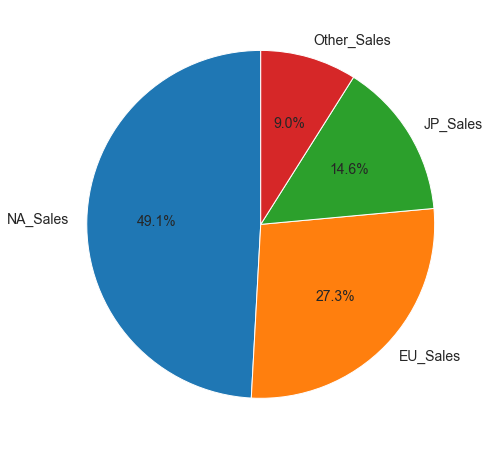

In [50]:
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

North America has the most sales, and it contribute almost half of the global sales

# Q4: Which publisher has the most global sales?

Group global sales by gaming publisher

In [51]:
df_publisher = df_sales[['Publisher', 'Global_Sales']]
df_publisher = df_publisher.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)
df_publisher = pd.DataFrame(df_publisher).reset_index()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Nintendo'),
  Text(1, 0, 'Electronic Arts'),
  Text(2, 0, 'Activision'),
  Text(3, 0, 'Sony Computer Entertainment'),
  Text(4, 0, 'Ubisoft'),
  Text(5, 0, 'Take-Two Interactive'),
  Text(6, 0, 'THQ'),
  Text(7, 0, 'Konami Digital Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Namco Bandai Games')])

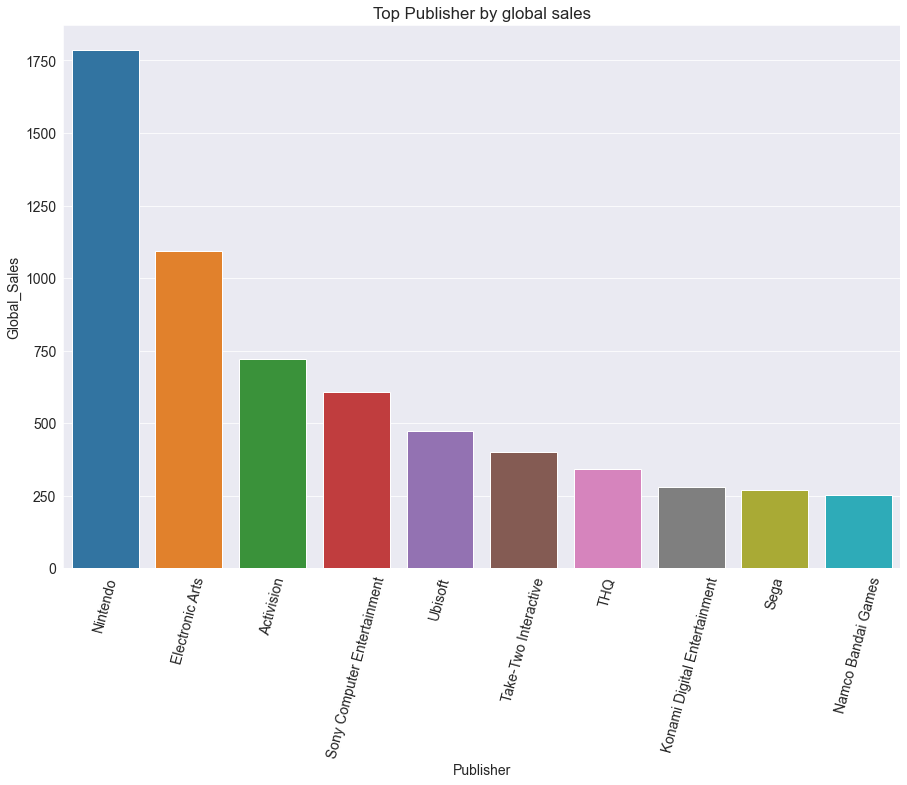

In [52]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Publisher', y='Global_Sales', data=df_publisher)
plt.title('Top Publisher by global sales')
plt.xticks(rotation=75)

X-axis is the publisher and Y-axis is the global sales. Nintendo is placed number one  by global sales

# Q5: Which gaming platform has the most global sales?

In [53]:
df_platform = df_sales[['Platform', 'Global_Sales']]
df_platform = df_platform.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)
df_platform = pd.DataFrame(df_platform).reset_index()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'PS2'),
  Text(1, 0, 'X360'),
  Text(2, 0, 'PS3'),
  Text(3, 0, 'Wii'),
  Text(4, 0, 'DS'),
  Text(5, 0, 'PS'),
  Text(6, 0, 'GBA'),
  Text(7, 0, 'PSP'),
  Text(8, 0, 'PS4'),
  Text(9, 0, 'PC')])

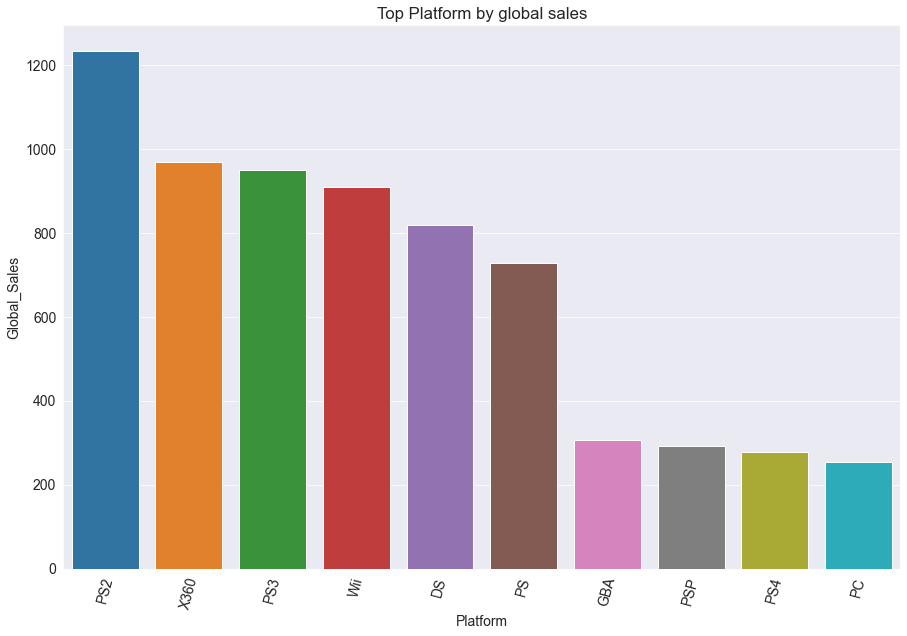

In [54]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Platform', y='Global_Sales', data=df_platform)
plt.title('Top Platform by global sales')
plt.xticks(rotation=75)

X-axis is the platform and Y-axis is the global sales.PS2 has the most global sales among all platform

In [55]:
import jovian

In [56]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "carllam23/gamesales" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/carllam23/gamesales


'https://jovian.ai/carllam23/gamesales'

## Inferences and Conclusion

To sum up, there are few conclusion. Firstly, the year of 2008 has the most global sales. Secondly, Action is the most popular gaming genre. Thirdly, North America contribute almost half of the global sales. Fourthly, Nintendo is the gaming publisher with most global sales. Lastly, PS2 has the most global sales among all gaming platform.

In [57]:
import jovian

In [58]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "carllam23/gamesales" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/carllam23/gamesales


'https://jovian.ai/carllam23/gamesales'

## References and Future Work

In the future, I can use this dataset to forecast the future sales of different gaming platform, genre, and publisher by using machine learning technique.

In [59]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>